In [1]:
#Import all important library
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Load housing data
TrainData = pd.read_csv("Mobile.csv")

Explore dataset 

In [4]:
TrainData.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
TrainData.shape

(2000, 21)

In [6]:
TrainData.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
TrainData.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
TrainData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Find any missing value

In [9]:
TrainData.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Explore column wise data

In [10]:
counts=TrainData["price_range"].value_counts()

In [11]:
percent100 = TrainData["price_range"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts price_range': counts, 'percent': percent100})

,counts price_range,percent
3,500,25.0%
2,500,25.0%
1,500,25.0%
0,500,25.0%


<AxesSubplot:title={'center':'count (price range)'}>

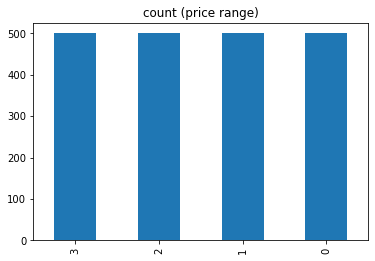

In [12]:
TrainData['price_range'].value_counts().plot(kind='bar', title='count (price range)')

Data is balance data

Lets explore relationship between battery power and price range

<AxesSubplot:ylabel='battery_power'>

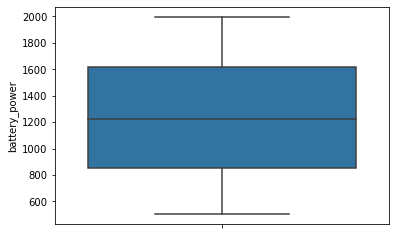

In [13]:
sns.boxplot(y=TrainData["battery_power"])

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

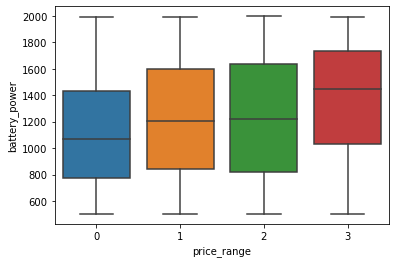

In [14]:
sns.boxplot(x="price_range", y="battery_power", data=TrainData)

check data is from normal distribution

In [15]:
print(TrainData['battery_power'].skew())

0.03189847179278164


it is belonging to normal distribution apply anova on battery power and price range

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('battery_power ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df          F        PR(>F)
price_range  1.555111e+07     1.0  83.877962  1.264854e-19
Residual     3.704325e+08  1998.0        NaN           NaN


from anova test between price range and battery power pvalue is less than 0.05 means battery power with respect to price range shows significant difference.

<AxesSubplot:title={'center':'count (blue)'}>

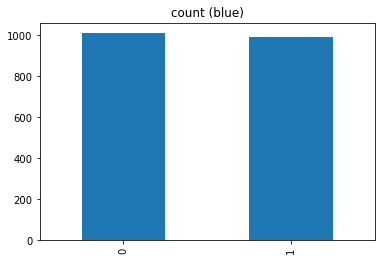

In [17]:
TrainData['blue'].value_counts().plot(kind='bar', title='count (blue)')

In [18]:
contigency= pd.crosstab(TrainData['blue'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print('Pvalue',p)

Pvalue 0.6980177809451273


The p-value is 69.80% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that bluetooth and price are independent.

Lets find for clock_speed and price range

<AxesSubplot:ylabel='clock_speed'>

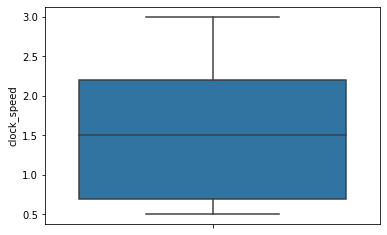

In [19]:
sns.boxplot(y=TrainData["clock_speed"])

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

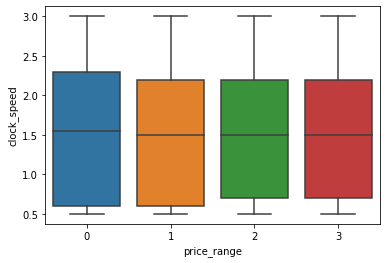

In [20]:
sns.boxplot(x="price_range", y="clock_speed", data=TrainData)

In [21]:
print(TrainData['clock_speed'].skew())

0.1780841202790887


In [22]:
TrainData['clock_speed_sqrt'] = np.sqrt(TrainData['clock_speed'])

In [23]:
print(TrainData['clock_speed_sqrt'].skew())

-0.08894300716253523


<AxesSubplot:ylabel='clock_speed_sqrt'>

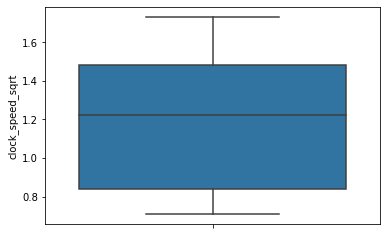

In [24]:
sns.boxplot(y=TrainData["clock_speed_sqrt"])

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('clock_speed_sqrt ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
price_range    0.000017     1.0  0.000145  0.990388
Residual     240.523027  1998.0       NaN       NaN


from anova test between price range and clock speed pvalue is not less than 0.05 means clock speed with respect to price range does not shows significant difference.

<AxesSubplot:title={'center':'count (dual_sim)'}>

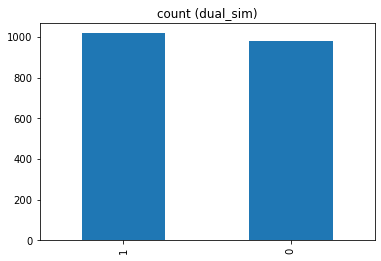

In [26]:
TrainData['dual_sim'].value_counts().plot(kind='bar', title='count (dual_sim)')

In [27]:
contigency= pd.crosstab(TrainData['dual_sim'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print("p value",p)

p value 0.7323497176264594


The p-value is 73.23% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that dual_sim and price are independent.

Lets explore for fc : Front Camera megapixels

<AxesSubplot:ylabel='fc'>

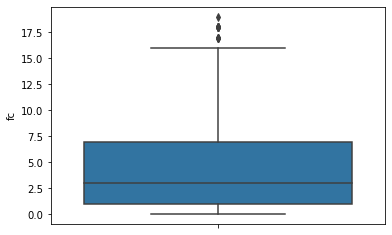

In [28]:
sns.boxplot(y=TrainData["fc"])

<AxesSubplot:xlabel='price_range', ylabel='fc'>

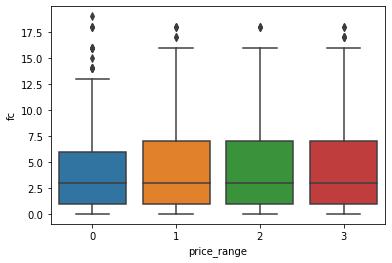

In [29]:
sns.boxplot(x="price_range", y="fc", data=TrainData)

In Front Camera megapixels we have found outliers

So we fix this outliers

In [30]:
Q1 = TrainData['fc'].quantile(0.25)
Q3 = TrainData['fc'].quantile(0.75)
IQR = Q3 - Q1
LR=(Q1 - 1.5 * IQR)
UR=(Q3 + 1.5 * IQR)
print(IQR)
print(LR)
print(UR)

6.0
-8.0
16.0


In [31]:
TrainData['fc'] = np.where(TrainData['fc'] <-8.0, -8.0,TrainData['fc'])
TrainData['fc'] = np.where(TrainData['fc'] >16.0, 16.0,TrainData['fc'])
print(TrainData['fc'].skew())

0.9692317017572974


<AxesSubplot:ylabel='fc'>

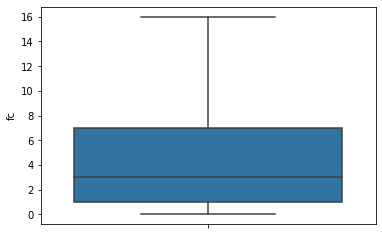

In [32]:
sns.boxplot(y=TrainData["fc"])

In [33]:
print(TrainData['fc'].skew())

0.9692317017572974


In [34]:
TrainData['fc_sqrt'] = np.sqrt(TrainData['fc'])

<AxesSubplot:ylabel='fc_sqrt'>

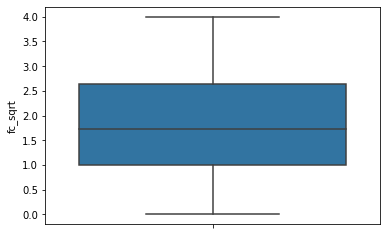

In [35]:
sns.boxplot(y=TrainData["fc_sqrt"])


In [36]:
print(TrainData['fc_sqrt'].skew())

-0.001095107409809438


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('fc_sqrt ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F    PR(>F)
price_range     1.811256     1.0  1.246715  0.264315
Residual     2902.740649  1998.0       NaN       NaN


from anova test between price range and fc pvalue is not less than 0.05 means fc with respect to price range does not shows significant difference.

<AxesSubplot:title={'center':'count (four_g)'}>

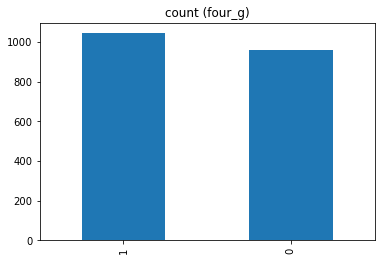

In [38]:
TrainData['four_g'].value_counts().plot(kind='bar', title='count (four_g)')

In [39]:
contigency= pd.crosstab(TrainData['four_g'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print("P value", p)

P value 0.36471408196943356


The p-value is 36.47% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that four_g and price are independent.

Lets explore for int_memory : Internal Memory in Gigabytes

<AxesSubplot:ylabel='int_memory'>

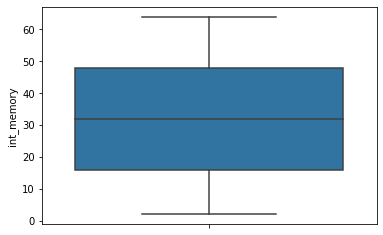

In [40]:
sns.boxplot(y=TrainData["int_memory"])

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

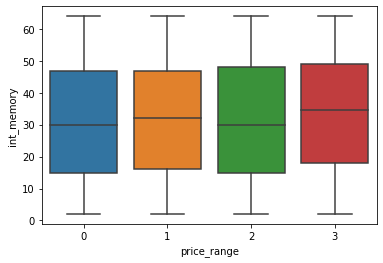

In [41]:
sns.boxplot(x="price_range", y="int_memory", data=TrainData)

In [42]:
print(TrainData['int_memory'].skew())

0.05788932785206039


In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('int_memory ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F   PR(>F)
price_range    1299.6025     1.0  3.952787  0.04693
Residual     656905.0730  1998.0       NaN      NaN


from anova test between price range and int_memory pvalue is less than 0.05 means int_memory with respect to price range shows significant difference.

Lets explore for m_dep : Mobile Depth in cm

<AxesSubplot:ylabel='m_dep'>

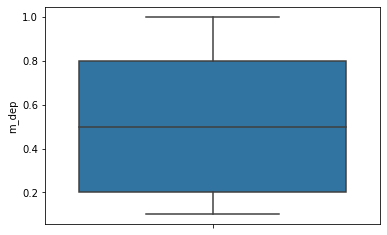

In [44]:
sns.boxplot(y=TrainData["m_dep"])

<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

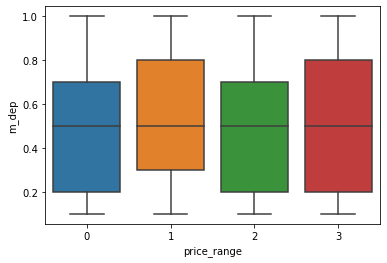

In [45]:
sns.boxplot(x="price_range", y="m_dep", data=TrainData)

In [46]:
print(TrainData['m_dep'].skew())

0.08908200979245855


In [47]:
TrainData['m_dep_sqrt'] = np.sqrt(TrainData['m_dep'])

<AxesSubplot:ylabel='m_dep_sqrt'>

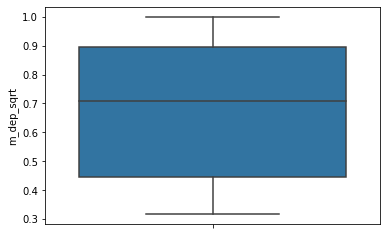

In [48]:
sns.boxplot(y=TrainData["m_dep_sqrt"])

In [49]:
print(TrainData['m_dep_sqrt'].skew())

-0.27875474894694174


In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('m_dep_sqrt ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
price_range   0.000204     1.0  0.004119  0.948834
Residual     98.857265  1998.0       NaN       NaN


from anova test between price range and m_dep pvalue is not less than 0.05 means m_dep with respect to price range does not shows significant difference.

Lets explore mobile_wt : Weight of mobile phone

<AxesSubplot:ylabel='mobile_wt'>

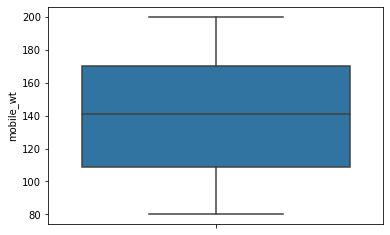

In [51]:
sns.boxplot(y=TrainData["mobile_wt"])

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

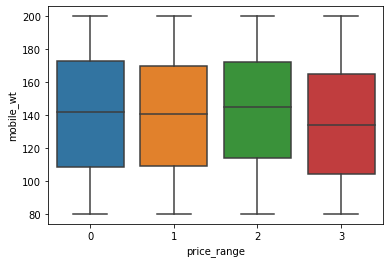

In [52]:
sns.boxplot(x="price_range", y="mobile_wt", data=TrainData)

In [53]:
print(TrainData['mobile_wt'].skew())

0.006558157428692449


In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('mobile_wt ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df         F    PR(>F)
price_range  2.300162e+03     1.0  1.836293  0.175539
Residual     2.502718e+06  1998.0       NaN       NaN


from anova test between price range and mobile_wt pvalue is not less than 0.05 means mobile_wt with respect to price range does not shows significant difference.

<AxesSubplot:title={'center':'count (n_cores)'}>

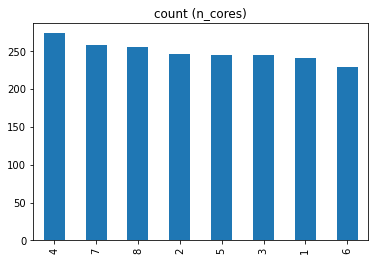

In [55]:
TrainData['n_cores'].value_counts().plot(kind='bar', title='count (n_cores)')

In [56]:
contigency= pd.crosstab(TrainData['n_cores'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print("pvalue", p)

pvalue 0.488293911066102


The p-value is 48.82% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that n_cores and price are independent.

Lets Explore for pc : Primary Camera megapixels

<AxesSubplot:ylabel='pc'>

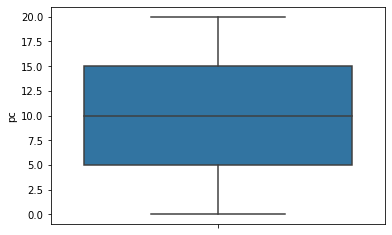

In [57]:
sns.boxplot(y=TrainData["pc"])

<AxesSubplot:xlabel='price_range', ylabel='pc'>

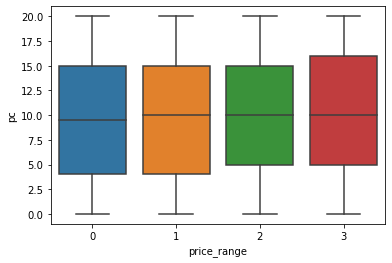

In [58]:
sns.boxplot(x="price_range", y="pc", data=TrainData)

In [59]:
print(TrainData['pc'].skew())

0.017306150471392553


In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('pc ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
price_range     82.9921     1.0  2.258117  0.133074
Residual     73432.0634  1998.0       NaN       NaN


from anova test between price range and pc pvalue is not less than 0.05 means pc with respect to price range does not shows significant difference.

Lets explore px_height: Pixel Resolution Height

<AxesSubplot:ylabel='px_height'>

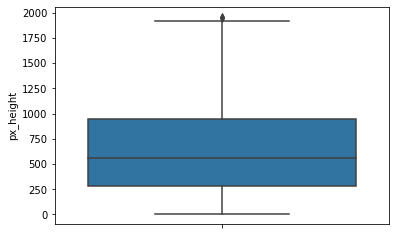

In [61]:
sns.boxplot(y=TrainData["px_height"])

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

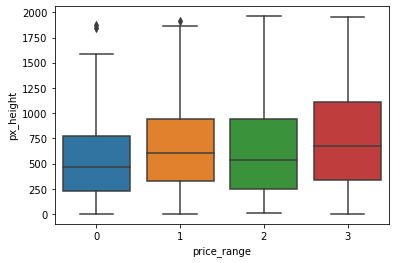

In [62]:
sns.boxplot(x="price_range", y="px_height", data=TrainData)

Pixel Resolution Height has found outliers 

In [63]:
Q1 = TrainData['px_height'].quantile(0.25)
Q3 = TrainData['px_height'].quantile(0.75)
IQR = Q3 - Q1
LR=(Q1 - 1.5 * IQR)
UR=(Q3 + 1.5 * IQR)
print(IQR)
print(LR)
print(UR)

664.5
-714.0
1944.0


In [64]:
TrainData['px_height'] = np.where(TrainData['px_height'] <-714.0, -714.0,TrainData['px_height'])
TrainData['px_height'] = np.where(TrainData['px_height'] >1944.0, 1944.0,TrainData['px_height'])
print(TrainData['px_height'].skew())

0.6658661340366808


<AxesSubplot:ylabel='px_height'>

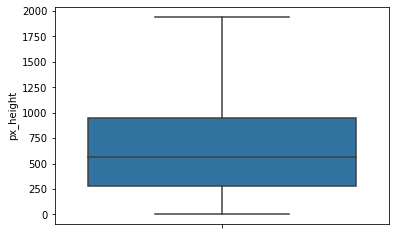

In [65]:
sns.boxplot(y=TrainData["px_height"])

In [66]:
print(TrainData['px_height'].skew())

0.6658661340366808


In [67]:
TrainData['px_height_sqrt'] = np.sqrt(TrainData['px_height'])

<AxesSubplot:ylabel='px_height_sqrt'>

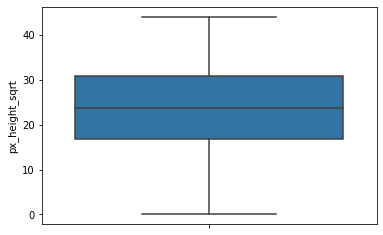

In [68]:
sns.boxplot(y=TrainData["px_height_sqrt"])

In [69]:
print(TrainData['px_height_sqrt'].skew())

-0.05490700179245843


In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('px_height ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df          F        PR(>F)
price_range  8.721686e+06     1.0  45.272809  2.231447e-11
Residual     3.849094e+08  1998.0        NaN           NaN


from anova test between price range and px_height pvalue is less than 0.05 means px_height with respect to price range shows significant difference.

Lets Explore px_width

<AxesSubplot:ylabel='px_width'>

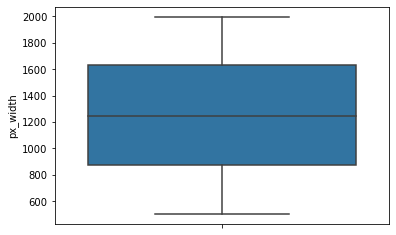

In [71]:
sns.boxplot(y=TrainData["px_width"])

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

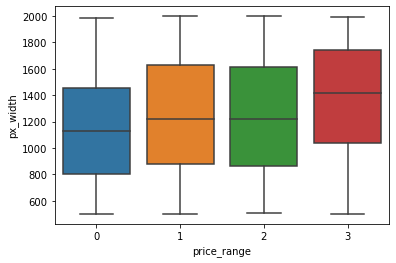

In [72]:
sns.boxplot(x="price_range", y="px_width", data=TrainData)

In [73]:
print(TrainData['px_width'].skew())

0.014787473768006081


In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('px_width ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df          F        PR(>F)
price_range  1.026696e+07     1.0  56.489089  8.478969e-14
Residual     3.631390e+08  1998.0        NaN           NaN


from anova test between price range and px_width pvalue is less than 0.05 means px_width with respect to price range shows significant difference.

Lets Explore for ram: Random Access Memory in Megabytes 

<AxesSubplot:ylabel='ram'>

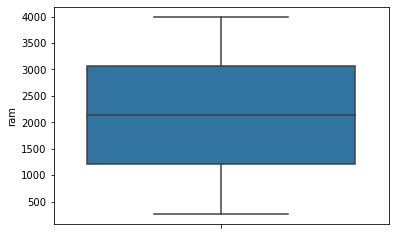

In [75]:
sns.boxplot(y=TrainData["ram"])

<AxesSubplot:xlabel='price_range', ylabel='ram'>

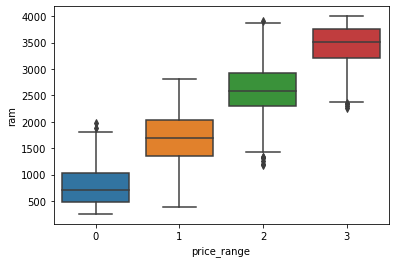

In [76]:
sns.boxplot(x="price_range", y="ram", data=TrainData)

In [77]:
print(TrainData['ram'].skew())

0.006628035398750348


In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('ram ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df             F  PR(>F)
price_range  1.978061e+09     1.0  10565.894952     0.0
Residual     3.740494e+08  1998.0           NaN     NaN


from anova test between price range and ram pvalue is less than 0.05 means ram with respect to price range shows significant difference.

Lets Explore for sc_h : Screen Height of mobile in cm

<AxesSubplot:ylabel='sc_h'>

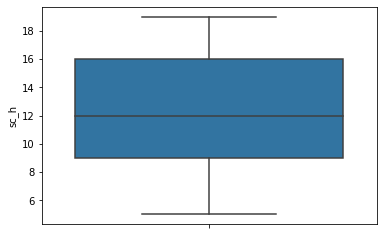

In [79]:
sns.boxplot(y=TrainData["sc_h"])

<AxesSubplot:xlabel='price_range', ylabel='sc_h'>

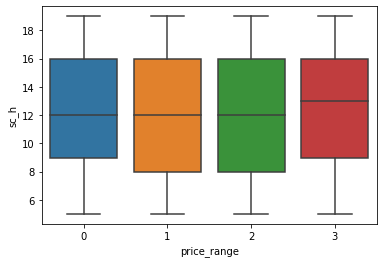

In [80]:
sns.boxplot(x="price_range", y="sc_h", data=TrainData)

In [81]:
print(TrainData['sc_h'].skew())

-0.09888424098283438


In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('sc_h ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df        F    PR(>F)
price_range     18.7489     1.0  1.05622  0.304203
Residual     35466.3666  1998.0      NaN       NaN


from anova test between price range and sc_h pvalue is not less than 0.05 means sc_h with respect to price range does not shows significant difference.

Lets Explore for sc_w : Screen Width of mobile in cm

<AxesSubplot:ylabel='sc_w'>

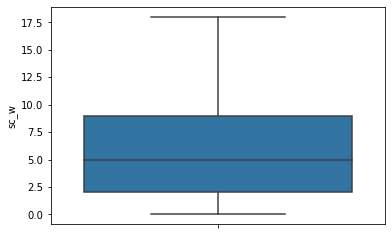

In [83]:
sns.boxplot(y=TrainData["sc_w"])

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

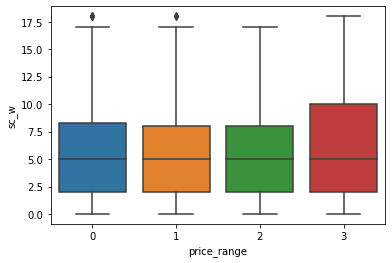

In [84]:
sns.boxplot(x="price_range", y="sc_w", data=TrainData)

In [85]:
print(TrainData['sc_w'].skew())

0.6337870734456067


In [86]:
TrainData['sc_w_sqrt'] = np.sqrt(TrainData['sc_w'])

<AxesSubplot:ylabel='sc_w_sqrt'>

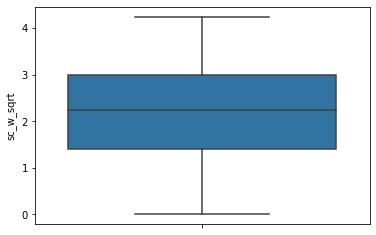

In [87]:
sns.boxplot(y=TrainData["sc_w_sqrt"])

In [88]:
print(TrainData['sc_w_sqrt'].skew())

-0.3664011053870454


In [89]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('sc_w_sqrt~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F    PR(>F)
price_range     1.850876     1.0  1.655971  0.198297
Residual     2233.161327  1998.0       NaN       NaN


from anova test between price range and sc_w pvalue is not less than 0.05 means sc_w with respect to price range does not shows significant difference.

Lets Explore for talk time 

<AxesSubplot:ylabel='talk_time'>

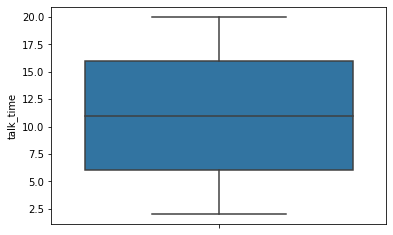

In [90]:
sns.boxplot(y=TrainData["talk_time"])

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

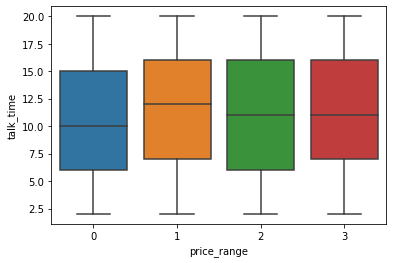

In [91]:
sns.boxplot(x="price_range", y="talk_time", data=TrainData)
#TrainData.boxplot('talk_time', by='price_range', figsize=(12, 8))

In [92]:
print(TrainData['talk_time'].skew())

0.009511762221541457


In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('talk_time ~ price_range',
                data=TrainData).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
price_range     28.5156     1.0  0.955121  0.328537
Residual     59651.2424  1998.0       NaN       NaN


from anova test between price range and talk_time pvalue is not less than 0.05 means talk_time with respect to price range does not shows significant difference.

Explore for three_g

<AxesSubplot:title={'center':'count (three_g)'}>

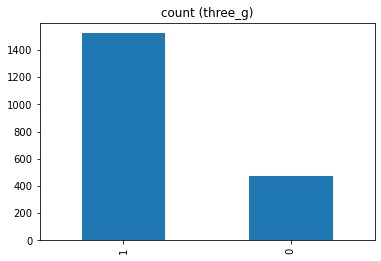

In [94]:
TrainData['three_g'].value_counts().plot(kind='bar', title='count (three_g)')

In [95]:
contigency= pd.crosstab(TrainData['three_g'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
p

0.7116958581372179

The p-value is 71.16% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that three_g and price are independent.

Explore for touch_screen : Has touch screen or not

<AxesSubplot:title={'center':'count (touch_screen)'}>

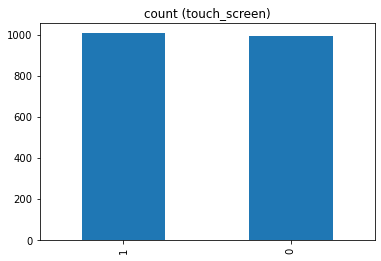

In [96]:
TrainData['touch_screen'].value_counts().plot(kind='bar', title='count (touch_screen)')

In [97]:
contigency= pd.crosstab(TrainData['touch_screen'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print("p value", p)

p value 0.27470114180281896


The p-value is 27.47% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that touch_screen and price are independent.

Explore wifi : Has wifi or not

<AxesSubplot:title={'center':'count (wifi)'}>

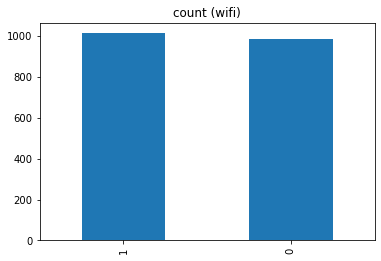

In [98]:
TrainData['wifi'].value_counts().plot(kind='bar', title='count (wifi)')

In [99]:
contigency= pd.crosstab(TrainData['wifi'], TrainData['price_range'])
contigency
c, p, dof, expected = chi2_contingency(contigency)
print("P value",p)

P value 0.8359905195342198


The p-value is 83.59% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that wifi and price are independent.

After observing each column bluetooth, dual_sim, four_g, n_cores, three_g, touch_screen, wifi, Price_range is categorical features in this data

In [100]:
#Convert categorical in dummies
TrainData = pd.get_dummies(TrainData, 
                     columns = ['blue','dual_sim','four_g', 'three_g','touch_screen', 'wifi'],drop_first=True)

In [101]:
TrainData.shape

(2000, 26)

In [102]:
TrainData.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range', 'clock_speed_sqrt', 'fc_sqrt',
       'm_dep_sqrt', 'px_height_sqrt', 'sc_w_sqrt', 'blue_1', 'dual_sim_1',
       'four_g_1', 'three_g_1', 'touch_screen_1', 'wifi_1'],
      dtype='object')

In [143]:
#Segregate the dependent column(y) from the data frame and X is independent column
X=TrainData.drop(['price_range', 'fc','m_dep', 'clock_speed', 'px_height', 'sc_w'] ,axis=1)
y=TrainData['price_range']

In [104]:
X.shape

(2000, 20)

Fit logistics Regression model 

In [144]:
#Split Dataset in training and testing in ratio 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [145]:
#Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

d:\a\cc\ana\envs\insurance\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [146]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.64
Accuracy of logistic regression classifier on test set: 0.63


This is not overfit model but it is underfit model


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[122  29   0   0]
 [ 29  69  31   6]
 [  0  36  65  50]
 [  0   1  41 121]]


K-fold cross validation

In [109]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.628 (0.027)


Lets standardised data and fit logistics regression

In [148]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [112]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.97
Accuracy of logistic regression classifier on test set: 0.93


This is good model neither overfit nor underfit.accuracy for training dataset is 97% and for testing it is 93%

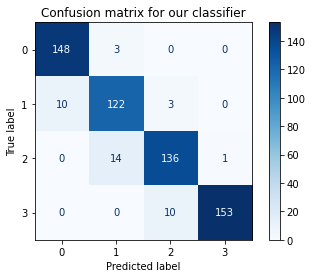

In [140]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average='micro')*100))

Accuracy: 93.17%
F1 score: 93.17%


In [116]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.949 (0.017)


Lets build model for Random Forest Classifier

In [ ]:
#Split Dataset in training and testing in ratio 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [149]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_100.fit(X_train, y_train)
y_pred = rfc_100.predict(X_test)

print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rfc_100.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc_100.score(X_test, y_test)))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average='micro')*100))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 0.88
Accuracy: 87.50%
F1 score: 87.50%


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_100.fit(X_train, y_train)
y_pred = rfc_100.predict(X_test)

print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rfc_100.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc_100.score(X_test, y_test)))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average='micro')*100))

Hyper parameter tuning for random forest classifier

In [130]:
from sklearn.model_selection import RandomizedSearchCV
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [134]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

Lets build XGBoost classifier

In [152]:
#Split Dataset in training and testing in ratio 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [153]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model=XGBClassifier( learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, 
                                                              scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
                                                              )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#accuracy_score(X_train, y_train)

print('Accuracy of Xgboost classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Xgboost  classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average='micro')*100))

d:\a\cc\ana\envs\insurance\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[11:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_m

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [155]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model=XGBClassifier( learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, 
                                                              scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
                                                              )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#accuracy_score(X_train, y_train)

print('Accuracy of Xgboost classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Xgboost  classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score: %.2f%%' % (f1_score(y_test, y_pred, average='micro')*100))

d:\a\cc\ana\envs\insurance\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[11:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_m